# GSEI 7200 MID-TERM FALL 21: CESM2-LE Climate Change Aanalysis

In this notebook, we are going to read CESM2-LE data on NCAR machine; areacella data from one of the fixed data file; and perform climate chnage analysis.

This tutorial is based on or inspired by NCAR X-Array Tutorial Given by Anderson Banihirwe <abanihi@ucar.edu>

Please direct any question to Dr. Sanjiv Kumar (szk0139@auburn.edu)


---

## Learning Objectives 


- Load data
- Compute climatologies and anomalies using `.groupby()`
- use areawighted function
- Use `.rolling()` to compute moving average
- compare global and regional average anomalies
- Visualize the data
- save the highqulaity figure


## Prerequisites


| Concepts | Importance | Notes |
| --- | --- | --- |
| [Understanding of xarray core data structures](./01-xarray-fundamentals.ipynb) | Necessary | |
| [Familiarity with xarray indexing and subsetting](./02-indexing-and-subsetting.ipynb) | Necessary | |
| [Familiarity with xarray's plotting functionality](./03-data-visualization.ipynb) | Necessary | |
| [Familiarity with xarray's computation routins](./05-computation.ipynb) | Necessary | |



- **Time to learn**: *20 minutes*



---

## Task 1: Import packages 


In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

## Task 2: Open the sea surface temperature dataset and the areacello

/glade/work/kumar34/miniconda3/envs/xarray-tutorial/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


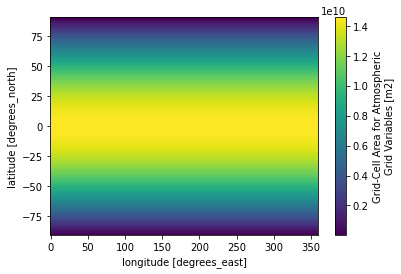

In [3]:
data = xr.open_dataset(
    "/glade/work/kumar34/CESM2-LE-data/b.e21.BHISTcmip6.BSSP370cmip6.f09_g17.LE2-1001.001.cam.h0.TREFHT.185001-210012.nc", engine="netcdf4"
)
data4 = xr.open_dataset("/glade/collections/cdg/data/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/fx/areacella/gn/v20190308/areacella_fx_CESM2_historical_r1i1p1f1_gn.nc", engine="netcdf4")
#Merge the two datasets in a single dataset
#ds = xr.merge([data, areacello])
#areacello
#data4
data4.areacella.plot()

## Task 3: Visualize the first time slice to make sure the data looks okay

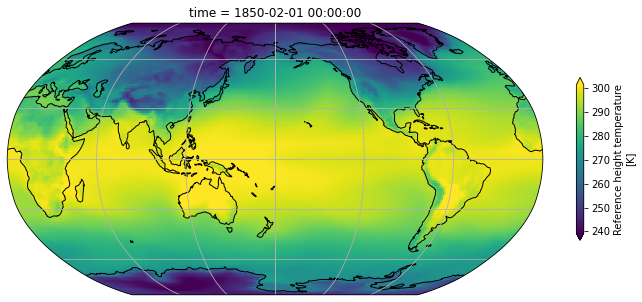

In [3]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()
data.TREFHT.isel(time=0).plot(
    robust=True, ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5}
)
ax.set_global()

## Task 4: Calculate Climatology

There are a few ways for selecting the Niño 3.4 region

1. Use `sel()` or `isel()`
2. Use `where()` and select all vlaues within the bounds of interest

In [4]:
#tos_nino34 = data.sel(lat=slice(-5, 5), lon=slice(190, 240))
tos = data
tos_climo = data.sel(time=slice("1951-01-01", "1980-12-31"))
tos_climo

<xarray.Dataset>
Dimensions:       (lat: 192, zlon: 1, nbnd: 2, lon: 288, lev: 32, ilev: 33, time: 360)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * zlon          (zlon) float64 0.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 1951-01-01 00:00:00 ... 1980-12-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/27)
    zlon_bnds     (zlon, nbnd) float64 ...
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    ...            ...
    n2ovmr        (time) float64 ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) float64 ...
    TREFHT        (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    logname:           sunseon
    host:              mom1
    initial_file:      b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.i.1001-01-...
    topography_file:   /mnt/lustre/share/CESM/cesm_input/atm/cam/topo/fv_0.9x...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Wed Oct 13 19:16:51 2021: ncrcat b.e21.BHISTcmip6.f09_...
    NCO:               netCDF Operators version 4.9.5 (Homepage = http://nco....

In [5]:
gb = tos.TREFHT.groupby('time.month')
#gb
gb_climo = tos_climo.TREFHT.groupby('time.month')
#gb_climo
tos_anom = gb - gb_climo.mean(dim='time')
tos_anom

<xarray.DataArray 'TREFHT' (time: 3012, lat: 192, lon: 288)>
array([[[ 0.74263   ,  0.74264526,  0.7426605 , ...,  0.7426605 ,
          0.7426605 ,  0.7426605 ],
        [ 1.3599548 ,  1.3735352 ,  1.3670807 , ...,  1.3195648 ,
          1.3281708 ,  1.3478088 ],
        [ 1.7007294 ,  1.7178497 ,  1.7326813 , ...,  1.6543732 ,
          1.6609192 ,  1.6807098 ],
        ...,
        [-4.0974884 , -4.101013  , -4.104599  , ..., -4.089157  ,
         -4.0924683 , -4.0951843 ],
        [-3.8637085 , -3.8628998 , -3.8620148 , ..., -3.8630981 ,
         -3.8638    , -3.8639984 ],
        [-3.614151  , -3.6144714 , -3.6147003 , ..., -3.613083  ,
         -3.6134796 , -3.6138306 ]],

       [[ 0.6796112 ,  0.6795807 ,  0.6796112 , ...,  0.6795807 ,
          0.67959595,  0.67959595],
        [ 0.76820374,  0.76145935,  0.75494385, ...,  0.78009033,
          0.7767792 ,  0.7729645 ],
        [ 1.2378998 ,  1.2083893 ,  1.1779938 , ...,  1.315094  ,
          1.289566  ,  1.2636719 ],
...
        [20.022247  , 19.996689  , 19.973236  , ..., 20.088715  ,
         20.06726   , 20.0466    ],
        [20.40335   , 20.392532  , 20.38115   , ..., 20.441498  ,
         20.427887  , 20.415176  ],
        [20.696762  , 20.695587  , 20.694458  , ..., 20.701202  ,
         20.6996    , 20.698105  ]],

       [[ 4.1920166 ,  4.1920013 ,  4.1920166 , ...,  4.1920013 ,
          4.1920166 ,  4.1920013 ],
        [ 4.8885803 ,  4.8886566 ,  4.8912506 , ...,  4.878723  ,
          4.879074  ,  4.881531  ],
        [ 5.092972  ,  5.102188  ,  5.1054535 , ...,  5.0695953 ,
          5.084198  ,  5.091324  ],
        ...,
        [25.196838  , 25.174057  , 25.153824  , ..., 25.26184   ,
         25.240189  , 25.21991   ],
        [25.611374  , 25.602234  , 25.593079  , ..., 25.644714  ,
         25.632797  , 25.621582  ],
        [26.020325  , 26.018753  , 26.017273  , ..., 26.02629   ,
         26.02414   , 26.022125  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
    month    (time) int64 2 3 4 5 6 7 8 9 10 11 12 ... 3 4 5 6 7 8 9 10 11 12 1

Another option for selecting our region of interest is to use:

In [7]:
tos_pr = tos_anom.sel(time=slice("1981-01-01", "2010-12-31"))
#tos_pr
tos_pr_mean = tos_pr.mean(dim='time')
#tos_pr_mean
tos_ft = tos_anom.sel(time=slice("2071-01-01", "2100-12-31"))
tos_ft_mean = tos_ft.mean(dim='time')
tos_ft_mean

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
array([[6.0914497, 6.0914392, 6.091449 , ..., 6.091444 , 6.091445 ,
        6.0914593],
       [6.188854 , 6.185664 , 6.182735 , ..., 6.198148 , 6.195125 ,
        6.191946 ],
       [6.2183065, 6.212142 , 6.206109 , ..., 6.23667  , 6.2306023,
        6.224484 ],
       ...,
       [8.368978 , 8.361496 , 8.354622 , ..., 8.388654 , 8.3822565,
        8.376161 ],
       [8.467603 , 8.464467 , 8.461196 , ..., 8.478347 , 8.474575 ,
        8.47097  ],
       [8.539087 , 8.538784 , 8.538503 , ..., 8.540176 , 8.539793 ,
        8.539414 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

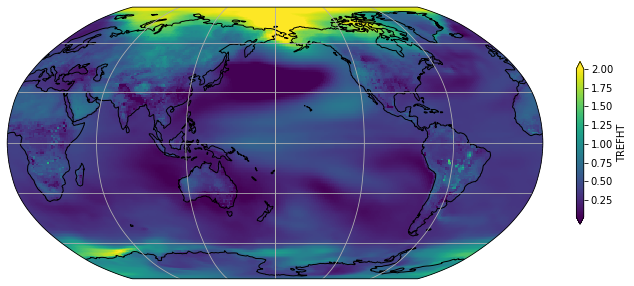

In [9]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()
tos_pr_mean.plot(
    robust=True, ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5}
)
ax.set_global()
fig.savefig('TREFHT_ANOM_1981_2010.png', dpi=300)

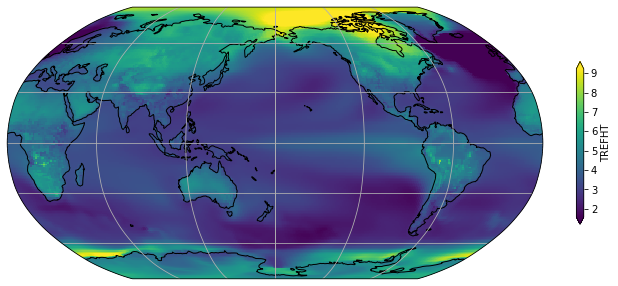

In [10]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()
tos_ft_mean.plot(
    robust=True, ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5}
)
ax.set_global()
fig.savefig('TREFHT_ANOM_2071_2100.png', dpi=300)

In [11]:
tos_anom_glb = tos_anom.groupby('time.year').mean()
tos_anom_glb

<xarray.DataArray 'TREFHT' (year: 252, lat: 192, lon: 288)>
array([[[-3.20376307e-01, -3.20390195e-01, -3.20386022e-01, ...,
         -3.20391566e-01, -3.20387393e-01, -3.20373535e-01],
        [-1.51984468e-01, -1.50489107e-01, -1.50784582e-01, ...,
         -1.58752441e-01, -1.56817347e-01, -1.54507726e-01],
        [-2.53018457e-03, -1.45097217e-03, -7.56003661e-04, ...,
         -9.19827539e-03, -7.12308008e-03, -5.15469629e-03],
        ...,
        [-1.83938181e+00, -1.84283030e+00, -1.84600687e+00, ...,
         -1.83249867e+00, -1.83456981e+00, -1.83657837e+00],
        [-1.75538778e+00, -1.75641012e+00, -1.75751984e+00, ...,
         -1.75179219e+00, -1.75298238e+00, -1.75424469e+00],
        [-1.70591044e+00, -1.70605326e+00, -1.70618236e+00, ...,
         -1.70542490e+00, -1.70559549e+00, -1.70576477e+00]],

       [[-3.25995117e-01, -3.25982422e-01, -3.25977325e-01, ...,
         -3.25983673e-01, -3.25978607e-01, -3.25978607e-01],
        [-1.44640610e-01, -1.42292023e-01, -1.39878586e-01, ...,
         -1.53175354e-01, -1.50333405e-01, -1.47626236e-01],
        [-5.82148246e-02, -5.38673401e-02, -4.90417480e-02, ...,
         -7.22465515e-02, -6.78316727e-02, -6.32425919e-02],
...
          1.05541086e+01,  1.05448751e+01,  1.05362434e+01],
        [ 1.07208261e+01,  1.07174730e+01,  1.07140617e+01, ...,
          1.07336092e+01,  1.07289133e+01,  1.07246275e+01],
        [ 1.08976288e+01,  1.08970184e+01,  1.08964624e+01, ...,
          1.08998289e+01,  1.08990297e+01,  1.08982887e+01]],

       [[ 4.19201660e+00,  4.19200134e+00,  4.19201660e+00, ...,
          4.19200134e+00,  4.19201660e+00,  4.19200134e+00],
        [ 4.88858032e+00,  4.88865662e+00,  4.89125061e+00, ...,
          4.87872314e+00,  4.87907410e+00,  4.88153076e+00],
        [ 5.09297180e+00,  5.10218811e+00,  5.10545349e+00, ...,
          5.06959534e+00,  5.08419800e+00,  5.09132385e+00],
        ...,
        [ 2.51968384e+01,  2.51740570e+01,  2.51538239e+01, ...,
          2.52618408e+01,  2.52401886e+01,  2.52199097e+01],
        [ 2.56113739e+01,  2.56022339e+01,  2.55930786e+01, ...,
          2.56447144e+01,  2.56327972e+01,  2.56215820e+01],
        [ 2.60203247e+01,  2.60187531e+01,  2.60172729e+01, ...,
          2.60262909e+01,  2.60241394e+01,  2.60221252e+01]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100 2101

Let's plot the selected region to make sure we are doing the right thing:

In [12]:
tos_anom_glb_mean = tos_anom_glb.mean(dim=['lat', 'lon'])
#tos_anom_glb_mean

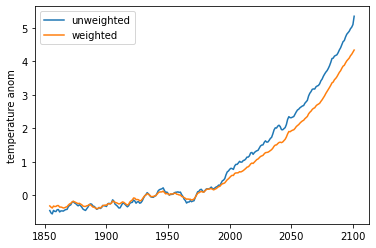

In [13]:
tos_anom_glb_mean2 = tos_anom_glb.weighted(data4.areacella).mean(dim=['lat', 'lon'])
plt.plot(tos_anom_glb_mean.year, tos_anom_glb_mean.rolling(year=5).mean(), label='unweighted')
plt.plot(tos_anom_glb_mean2.year, tos_anom_glb_mean2.rolling(year=5).mean(), label='weighted')
plt.ylabel('temperature anom')
plt.legend()
#plt.show()
plt.savefig('global_anom_wgt_unwgt.png', dpi=300)

In [14]:
tos_anom_se = tos_anom_glb.sel(lat=slice(24.0, 38.0), lon=slice(265.0, 285.0))
tos_anom_se
CAREA_SE = data4.areacella.sel(lat=slice(24.0, 38.0), lon=slice(265.0, 285.0))
CAREA_SE
tos_anom_se_mean_unwgt = tos_anom_se.mean(dim=['lat', 'lon'])
tos_anom_se_mean_unwgt
tos_anom_se_mean_wgt = tos_anom_se.weighted(CAREA_SE).mean(dim=['lat', 'lon'])
tos_anom_se_mean_wgt

<xarray.DataArray 'TREFHT' (year: 252)>
array([ 1.9202252e-01,  2.7906391e-01,  7.3508507e-01,  1.8092988e-01,
        8.3560936e-02, -4.9956180e-02, -4.2083231e-01, -3.6184040e-01,
        6.7696881e-01,  5.0375670e-02,  6.2522270e-02, -6.3446176e-01,
        8.5699689e-01, -1.0218841e+00,  2.0174846e-01,  1.8810791e-01,
        4.0329853e-01,  8.5103148e-01,  3.5560301e-01, -5.1428622e-01,
       -8.4632021e-01,  2.1066391e-01,  9.7949393e-02,  2.6376566e-01,
        5.6491321e-01,  5.5021274e-01, -5.3068680e-01, -2.9098791e-01,
        3.3221295e-01,  3.8140208e-01,  7.6508075e-01,  2.0609604e-01,
        7.9525310e-01, -3.4213337e-01,  4.4216079e-01,  2.0212232e-01,
        9.4411433e-02, -8.0708551e-01, -4.3061767e-02,  7.6620209e-01,
        4.4986215e-01, -2.4010167e-01, -8.2319632e-02,  3.2976657e-01,
        1.8569504e-01,  4.7001860e-01, -4.4097733e-01, -1.2746985e-01,
        5.3992665e-01, -7.9057515e-01, -1.6749522e-01,  6.9734730e-02,
       -2.0547961e-01,  6.0884278e-02, -3.9120743e-01, -2.3458041e-02,
       -1.9431646e-01, -4.6594467e-02, -3.3705738e-01,  9.1953978e-02,
       -4.7919855e-01, -4.3706578e-01, -5.0847590e-02, -8.3346136e-02,
        1.8862978e-01,  1.2373839e-01,  3.6368093e-01, -4.9911508e-01,
       -7.0146453e-01, -9.3296063e-01,  9.2838627e-01,  1.2056272e+00,
        4.7209263e-01,  5.3767043e-01, -3.1607905e-03, -1.3317353e+00,
        2.5381124e-01,  7.6205015e-01,  1.4940766e-01,  6.3513941e-01,
...
        1.3442941e+00,  2.1377749e+00,  7.2486120e-01,  9.7193760e-01,
        1.8231521e+00,  2.3916965e+00,  1.5018334e+00,  1.2343498e+00,
        1.2480863e+00,  1.8730547e+00,  2.0182650e+00,  2.3878520e+00,
        1.6981242e+00,  2.3436911e+00,  2.0665481e+00,  2.4213274e+00,
        2.6530526e+00,  1.7874291e+00,  1.9296607e+00,  1.5893321e+00,
        2.4072895e+00,  2.2999499e+00,  2.1079044e+00,  2.7972839e+00,
        3.2214444e+00,  2.6297574e+00,  2.4429419e+00,  1.9884963e+00,
        2.5813222e+00,  2.8206294e+00,  2.2394035e+00,  1.7669166e+00,
        2.1054673e+00,  3.1738923e+00,  2.5078461e+00,  1.7240376e+00,
        2.3006248e+00,  3.1559248e+00,  3.0006974e+00,  3.4337318e+00,
        2.6378729e+00,  2.6420121e+00,  3.1349261e+00,  2.5139508e+00,
        2.9853423e+00,  3.6194618e+00,  2.4091105e+00,  3.2215900e+00,
        2.9072919e+00,  2.8645813e+00,  3.1543593e+00,  2.9463782e+00,
        3.6005168e+00,  3.3072984e+00,  3.4007280e+00,  3.2145517e+00,
        3.9481082e+00,  3.2572510e+00,  4.2327380e+00,  3.3645902e+00,
        3.8006511e+00,  3.5482376e+00,  2.9055288e+00,  4.0478535e+00,
        2.9363892e+00,  4.1619806e+00,  4.2245407e+00,  4.0856528e+00,
        4.1136880e+00,  4.1849294e+00,  4.7827015e+00,  3.3459647e+00,
        4.3798790e+00,  3.8801990e+00,  3.9548781e+00,  2.8169458e+00],
      dtype=float32)
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100 2101

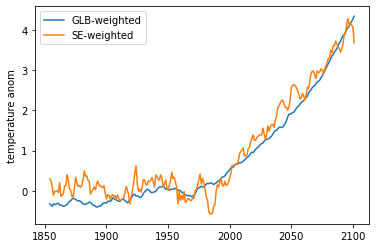

In [15]:
#plt.plot(tos_anom_glb_mean.year, tos_anom_glb_mean.rolling(year=5).mean(), label='GLB-unweighted')
plt.plot(tos_anom_glb_mean2.year, tos_anom_glb_mean2.rolling(year=5).mean(), label='GLB-weighted')
#plt.plot(tos_anom_se_mean_unwgt.year, tos_anom_se_mean_unwgt.rolling(year=5).mean(), label='SE-unweighted')
plt.plot(tos_anom_se_mean_wgt.year, tos_anom_se_mean_wgt.rolling(year=5).mean(), label='SE-weighted')
plt.ylabel('temperature anom')
plt.legend()
#plt.show()
plt.savefig('SW_GLB_anom_wgt_rev1.png', dpi=300)

---

In [16]:
%load_ext watermark
%watermark --time --python --updated --iversion

Last updated: 13:39:58

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.28.0

pandas    : 1.3.3
xarray    : 0.19.0
matplotlib: 3.4.3
sys       : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) 
[GCC 9.4.0]
json      : 2.0.9
cartopy   : 0.20.0
numpy     : 1.21.2



## Resources and References

- [Project Pythia Resource Gallery](https://projectpythia.org/gallery.html)
- [Pangeo Gallery](http://gallery.pangeo.io/)

<div class="admonition alert alert-success">
    <p class="title" style="font-weight:bold">Previous: <a href="./05-masking.ipynb">Masking Data</a></p>
    
</div>